# MC Integration

## Objectives:

* Become familiar with 2D arrays
* Learn MC integration techniques

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 2D arrays

Most of the array creation routines take lists or tuples for size:

In [2]:
print(np.zeros((2, 3, 4)))
print(np.zeros(3))

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
[0. 0. 0.]


You can also use nested lists or arrays to the normal constructor:

In [12]:
m = np.array([[1, 2], [3, 4], [5,6]])
print(m)
print(m[1,:])

[[1 2]
 [3 4]
 [5 6]]
[3 4]


In [13]:
print(m[0, :], "==", m[0])

[1 2] == [1 2]


In [5]:
m[:, 0]

array([1, 3])

In [16]:
np.sum(m, axis=1)

array([ 3,  7, 11])

In [17]:
np.sum(m, axis=1, keepdims=True)

array([[ 3],
       [ 7],
       [11]])

## Area of a circle

Imagine you want to calculate the area of a circle. There are different way for doing this bu here we will explore the so called, Monte Carlo Method.

For that, let us assume we have the following constraint
$$
x^2 + y^2 \le 1
$$
Let us embed this circle inside a square. Now what we will do is to through dots to the square and we will say that those dots that fall inside the circle provide us as a good estimation of the area as:

$$
A_{circle} = \frac{N_{\text{dots inside circle}}}{N_{total}} A_{square}
$$

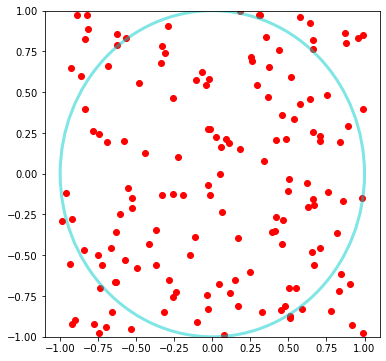

In [3]:
from matplotlib.patches import Circle, PathPatch


x = 2*np.random.rand(150)-1.0
y = 2*np.random.rand(150)-1.0

# x[1],y[1]

xy = 2*np.random.rand(2,150)-1.0
# xy[:,1]

fig, ax = plt.subplots(figsize=(6, 6))
plt.ylim(-1, 1.)
circle = Circle((0., 0.), 1, facecolor='none',
                edgecolor=(0, 0.8, 0.8), linewidth=3, alpha=0.5)
ax.add_patch(circle)
plt.scatter(x,y,c='r')

plt.show()

In [4]:
xy = np.random.rand(2, 10000) * 2 - 1
# xy[2,1000]
valid = np.sum(xy ** 2, axis=0) < 1
# x1^2+y1^2
print(valid[:10])
good = xy[:, valid]
print(good[:10])
bad = xy[:, ~valid]
print(bad[:10])
print(xy.shape,good.shape,bad.shape)

[False  True  True False  True False  True  True  True  True]
[[-0.8443196   0.4656253  -0.56503101 ...  0.605647    0.08463034
   0.42888782]
 [-0.27110335  0.65369268  0.46632907 ... -0.59934184 -0.19715782
  -0.47114722]]
[[-0.92578875 -0.86049998 -0.93978358 ... -0.70348999 -0.68817692
  -0.9409966 ]
 [-0.43562592 -0.88352735  0.35418596 ... -0.83369861 -0.92752099
  -0.65496865]]
(2, 10000) (2, 7866) (2, 2134)


(2, 7866) 2 7866


(-1.0999567326297495,
 1.099975827289132,
 -1.0998171977092877,
 1.0994578988196935)

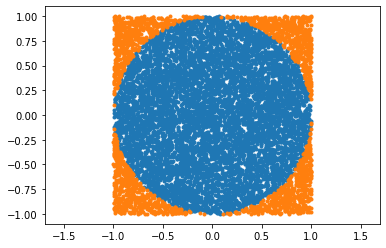

In [5]:
# good is a matrix of dimensions [2,numbers inside the circle]
# *good  =  good[0,:],good[1,:]
plt.plot(*good, ".")
print(good.shape, *good.shape)
plt.plot(*bad, ".")
plt.axis("equal")

In [6]:
np.mean(valid) * 4

3.1464

The reason why this approach really captures the integration comes from a very simple observation (mean value theorem):
$$
\int_a^b dx f(x) = (b - a) \langle f(x) \rangle = (b-a) \frac{1}{N} \sum_{i=1}^N f(x_i)
$$
Which is something simple: the area over a function is the length of the interval multiplied by the average of the function. This is the so called mean value theorem for integrals that can be stated as:

**if a function f is continuous on the closed interval [a,b] and differentiable on the open interval (a,b), then there exists a point c in the interval (a,b) such that** $\int_a^b f(x) = (b - a) f(c)$, which is the product of the base $b-a$ with the average heigth $f(c)$. 



## Volume of a sphere:

In [43]:
xy = np.random.rand(2, 100000) * 2 - 1
r2 = np.sum(xy ** 2, axis=0)
r2[r2 > 1] = 1
print("MC:    ", np.mean(np.sqrt(1 - r2)) * 4 * 2)
print("Actual:", 4 / 3 * np.pi)

MC:     4.17666827513382
Actual: 4.1887902047863905


### 10 D example

$$
f(x) = \left(x_{1} + \cdots + x_{10}\right)^2
$$

In [19]:
def f(x):
    return np.sum(x, axis=0) ** 2

In [20]:
s = np.random.rand(10, 1000000)

In [21]:
# s is a matrix of dimensionality [10,100000]
#f(s)  [1,100000]
np.mean(f(s))

25.83445427050231

In [22]:
155 / 6

25.833333333333332

Error estimate:

In [23]:
155 / 6 * 1 / np.sqrt(s.shape[1])

0.025833333333333333

## Difficult functions to integrate

In [48]:
from scipy import stats

df = 2.74

In [49]:
# this is the so called t-student probability density that you can look for on the web
# for example https://www.statisticshowto.com/probability-and-statistics/t-distribution/
begin, end = stats.t.cdf([-100, 100], df)
print("Analytic:", end - begin)

Analytic: 0.9999941949856226


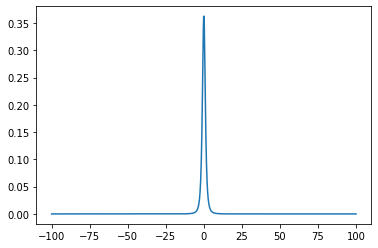

In [50]:
x = np.linspace(-100, 100, 1_000)
fig, ax = plt.subplots()
ax.plot(x, stats.t.pdf(x, df))
plt.show()

In [63]:
Nsamples=1000
X = (np.random.rand(Nsamples) - 0.5) * 200
np.mean(stats.t.pdf(X, df)) * 200

1.0848510695459013

In [64]:
1 / np.sqrt(Nsamples)

0.03162277660168379

#### Variance reduction

If the function you are trying to integrate has large variability what we do is to map the function into a different function that has smaller variability. This is obtained by doing
$$
\int_a^b dx f(x) = \int_a^b dx [f(x) - g(x)] + J
$$
where usually $J$ is obtained analitically.

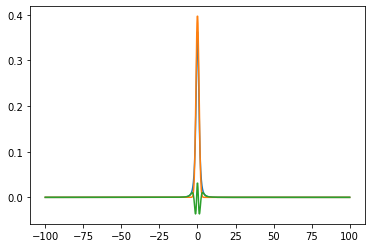

In [65]:
x = np.linspace(-100, 100, 1_000)
fig, ax = plt.subplots()
ax.plot(x, stats.t.pdf(x, df))
# a normal or Gaussian distribution
ax.plot(x, stats.norm.pdf(x, 0, 1))
ax.plot(x, stats.t.pdf(x, df) - stats.norm.pdf(x, 0, 1.2))
plt.show()

In [54]:
X = (np.random.rand(1000) - 0.5) * 200
Id = np.mean(stats.t.pdf(X, df) - stats.norm.pdf(X, 0, 1.2)) * 200
gaussInt = stats.norm.cdf(100, 0, 1.2) - stats.norm.cdf(-100, 0, 1.2)
print(Id + gaussInt)

1.0035314970122853


#### Importance sampling

Another method uses the idea that we need to focus on the regions where the funcion is larger. This is done by using that:
$$
\int_a^b dx f(x) = \int_a^b w(x) \frac{f(x)}{w(x)} dx = \langle \frac{f}{w} \rangle = \frac{1}{N} \sum \frac{f(x_i)}{w(x_i)}
$$
Of course, the trick here is that we select $w(x)$ such that $f(x)/w(x)$ is more "uniform". Therefore the random numbers to be used here are selected from the distribution $w(x)$.

In [55]:
Xg = np.random.normal(0, 1.2, 1000)
Xg = Xg[np.abs(Xg) <= 10]
print(len(Xg))
np.mean(stats.t.pdf(Xg, df) / stats.norm.pdf(Xg, 0, 1.2))

1000


0.9966177576295543

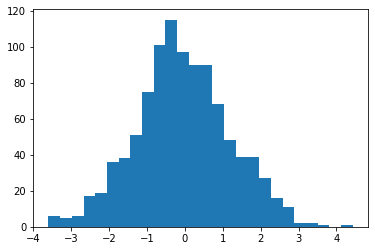

In [56]:
plt.hist(Xg, bins="auto")
plt.show()

## Von Neumann Rejection  (acceptance-rejection method)


This is maybe the most used method in Monte Carlo and follows the basic root. Before, we used Monte Carlo to calculate the area of a circle by accepting or rejecting points inside the circle. Now what we want is to choose $x_i$ with $w(x_i)$ as the probability distribution (define a line, or a simple geometry function that defines a maximum of $w(x_i)$. For example in 1D we choose $W_0 = max(w(x))$. We select points that are within $w(x)$. Basically, it generates sampling values from a target distribution $w(x)$.

In [57]:
Xy = np.random.rand(2, 10000)
Xy[0] -= 0.5
Xy[0] *= 10

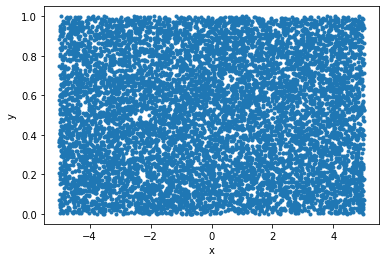

In [58]:
plt.plot(*Xy, ".")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [59]:
w0 = 0.5  # Must be higher than the maximum of the PDF
Xy[1] *= w0

In [60]:
valid = Xy[1] < stats.t.pdf(Xy[0], df)

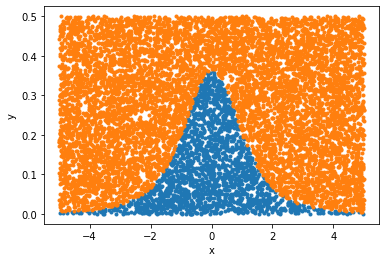

In [61]:
plt.plot(*Xy[:, valid], ".")
plt.plot(*Xy[:, ~valid], ".")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

It's not a great way to calculate an integral, but we can:

In [62]:
np.mean(valid) * w0 * 10

0.9785